In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from itertools import product
import matplotlib.pyplot as plt

# load dataset 4

In [2]:
df = pd.read_csv('4_debt_to_income_ratio_and_applicant_age.csv', low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88058 entries, 0 to 88057
Data columns (total 34 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   census_tract                              88024 non-null  float64
 1   action_taken                              88058 non-null  int64  
 2   loan_type                                 88058 non-null  int64  
 3   lien_status                               88058 non-null  int64  
 4   reverse_mortgage                          88058 non-null  int64  
 5   open_end_line_of_credit                   88058 non-null  int64  
 6   loan_amount                               88058 non-null  int64  
 7   combined_loan_to_value_ratio              67034 non-null  object 
 8   interest_rate                             58334 non-null  object 
 9   total_loan_costs                          56823 non-null  object 
 10  origination_charges               

In [4]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['combined_loan_to_value_ratio',
 'interest_rate',
 'total_loan_costs',
 'origination_charges',
 'loan_term',
 'property_value',
 'debt_to_income_ratio']

In [5]:

interest_rate_counts = df['interest_rate'].value_counts().reset_index()
interest_rate_counts.columns = ['interest_rate', 'count']

# This will give you a DataFrame with two columns: 'interest_rate' and 'count'.
print(interest_rate_counts)

# Display the top N values, e.g., top 10
top_N = 10
top_interest_rates = interest_rate_counts.head(top_N)

# This will give you a DataFrame with the top N interest rates and their counts.
print(top_interest_rates)

    interest_rate  count
0           3.875   5704
1             4.0   5004
2           4.375   4935
3           4.125   4881
4            3.75   4154
..            ...    ...
125         4.624      1
126         5.865      1
127         2.975      1
128         3.695      1
129          4.15      1

[130 rows x 2 columns]
  interest_rate  count
0         3.875   5704
1           4.0   5004
2         4.375   4935
3         4.125   4881
4          3.75   4154
5          4.25   3576
6           4.5   3364
7         3.625   3151
8           3.5   3103
9         4.625   2466


In [6]:
# Assuming interest_rate_counts is the DataFrame with interest rates and their counts
interest_rate_values_less_than_10 = interest_rate_counts[interest_rate_counts['count'] < 100]

# This will give you a DataFrame with the interest rates that have less than 10 entries.
print(interest_rate_values_less_than_10)


    interest_rate  count
37           3.49     87
38           2.25     66
39          6.375     62
40            6.5     61
41           5.49     47
..            ...    ...
125         4.624      1
126         5.865      1
127         2.975      1
128         3.695      1
129          4.15      1

[93 rows x 2 columns]


In [7]:
# First, convert the 'interest_rate' column to numeric (float)
df['interest_rate'] = pd.to_numeric(df['interest_rate'], errors='coerce')

# Now, calculate the minimum, maximum, and median
minimum_interest_rate = df['interest_rate'].min()
maximum_interest_rate = df['interest_rate'].max()
median_interest_rate = df['interest_rate'].median()

print("Minimum Interest Rate:", minimum_interest_rate)
print("Maximum Interest Rate:", maximum_interest_rate)
print("Median Interest Rate:", median_interest_rate)

Minimum Interest Rate: 0.0
Maximum Interest Rate: 8.25
Median Interest Rate: 4.0


## Number of entries with a minimum interest rate

In [8]:
count_zero_interest_rate = len(df[df['interest_rate'] == 0.0])
print("Number of entries with a minimum interest rate of 0.0:", count_zero_interest_rate)

Number of entries with a minimum interest rate of 0.0: 239


In [9]:
# Filter the DataFrame to select only rows with a minimum interest rate of 0.0
zero_interest_rate_entries = df[df['interest_rate'] == 0.0]

# Count the occurrences of each 'action_taken' category
action_taken_counts = zero_interest_rate_entries['action_taken'].value_counts()

# Print the counts for each 'action_taken' category
print("Count of each 'action_taken' category for entries with a minimum interest rate of 0.0:")
print(action_taken_counts)


Count of each 'action_taken' category for entries with a minimum interest rate of 0.0:
action_taken
1    237
2      2
Name: count, dtype: int64


- 1 - Loan originated
- 2 - Application approved but not accepted
- 3 - Application denied
- 4 - Application withdrawn by applicant
- 5 - File closed for incompleteness
- 6 - Purchased loan
- 7 - Preapproval request denied
- 8 - Preapproval request approved but not accepted

## Number of entries with a maximum interest rate

In [10]:
# Find the maximum interest rate in the DataFrame
max_interest_rate = df['interest_rate'].max()

# Filter the DataFrame to select only rows with the maximum interest rate
max_interest_rate_entries = df[df['interest_rate'] == max_interest_rate]

# Count the number of entries with the maximum interest rate
count_max_interest_rate = len(max_interest_rate_entries)

print("Number of entries with the maximum interest rate:", count_max_interest_rate)


Number of entries with the maximum interest rate: 1


In [11]:
# Find the maximum interest rate in the DataFrame
max_interest_rate = df['interest_rate'].max()

# Filter the DataFrame to select only rows with the maximum interest rate
max_interest_rate_entries = df[df['interest_rate'] == max_interest_rate]

# Get the unique values in the 'action_taken' column for these filtered entries
unique_action_taken_values = max_interest_rate_entries['action_taken'].unique()

# Print the unique 'action_taken' values for entries with the maximum interest rate
print("Unique 'action_taken' values for entries with the maximum interest rate:")
print(unique_action_taken_values)


Unique 'action_taken' values for entries with the maximum interest rate:
[1]


## Interquartile Range (IQR) for 'interest_rate'

In [12]:
# Calculate the first quartile (Q1) and third quartile (Q3) of 'interest_rate'
Q1 = df['interest_rate'].quantile(0.25)
Q3 = df['interest_rate'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

print("Interquartile Range (IQR) for 'interest_rate' across all rows:", IQR)

Interquartile Range (IQR) for 'interest_rate' across all rows: 0.75


## first quartile (Q1) and third quartile (Q3): 50% of the data falls within this range

In [13]:
# Calculate the first quartile (Q1) and third quartile (Q3) for 'interest_rate'
Q1 = df['interest_rate'].quantile(0.25)
Q3 = df['interest_rate'].quantile(0.75)

print("First Quartile (Q1):", Q1)
print("Third Quartile (Q3):", Q3)


First Quartile (Q1): 3.625
Third Quartile (Q3): 4.375


## the range that contains 90% of the data: 5th percentile (Q5) and the 95th percentile (Q95)

In [14]:
# Calculate the 5th percentile (Q5) and 95th percentile (Q95) for 'interest_rate'
Q5 = df['interest_rate'].quantile(0.05)
Q95 = df['interest_rate'].quantile(0.95)

print("5th Percentile (Q5):", Q5)
print("95th Percentile (Q95):", Q95)

# Calculate the range for 90% of the data
data_range_90_percent = Q95 - Q5

print("Range for 90% of the data:", data_range_90_percent)


5th Percentile (Q5): 3.0
95th Percentile (Q95): 5.125
Range for 90% of the data: 2.125


# Conclusion

90% of the interest rates are between 3% and 5.25%

50% of the interest rates are between 3.75 and 4.5%

# Make new categories

In [15]:
# Define a function to categorize interest rates into the desired ranges
def categorize_interest_rate(rate):
    if rate >= 0.0 and rate <= 1.0:
        return '0.0-1.0'
    elif rate > 1.0 and rate <= 2.0:
        return '1.0-2.0'
    elif rate > 2.0 and rate <= 3.0:
        return '2.0-3.0'
    elif rate > 3.0 and rate <= 3.5:
        return '3.0-3.5'
    elif rate > 3.5 and rate <= 4.0:
        return '3.5-4.0'
    elif rate > 4.0 and rate <= 4.5:
        return '4.0-4.5'
    elif rate > 4.5 and rate <= 5.0:
        return '4.5-5.0'
    elif rate > 5.0 and rate <= 6.0:
        return '5.0-6.0'
    elif rate > 6.0 and rate <= 7.0:
        return '6.0-7.0'
    elif rate > 7.0 and rate <= 8.0:
        return '7.0-8.0'
    elif rate > 8.0 and rate <= 9.9:
        return '8.0-9.0'
    else:
        return 'Other'

# Apply the categorization function to 'interest_rate' column
df['interest_rate'] = df['interest_rate'].apply(categorize_interest_rate)

# Print the result
print(df['interest_rate'].value_counts())


interest_rate
Other      29833
3.5-4.0    18943
4.0-4.5    17148
3.0-3.5     8761
4.5-5.0     6627
2.0-3.0     3069
5.0-6.0     2958
6.0-7.0      418
0.0-1.0      241
7.0-8.0       49
1.0-2.0        9
8.0-9.0        2
Name: count, dtype: int64


In [16]:
# Filter the DataFrame to show 'interest_rate' values in the 'Other' category
other_interest_rates = df[df['interest_rate'] == 'Other']

# Print the unique interest rates in the 'Other' category
unique_other_interest_rates = other_interest_rates['interest_rate'].unique()

print("Unique Interest Rates in 'Other' Category:")
print(unique_other_interest_rates)


Unique Interest Rates in 'Other' Category:
['Other']


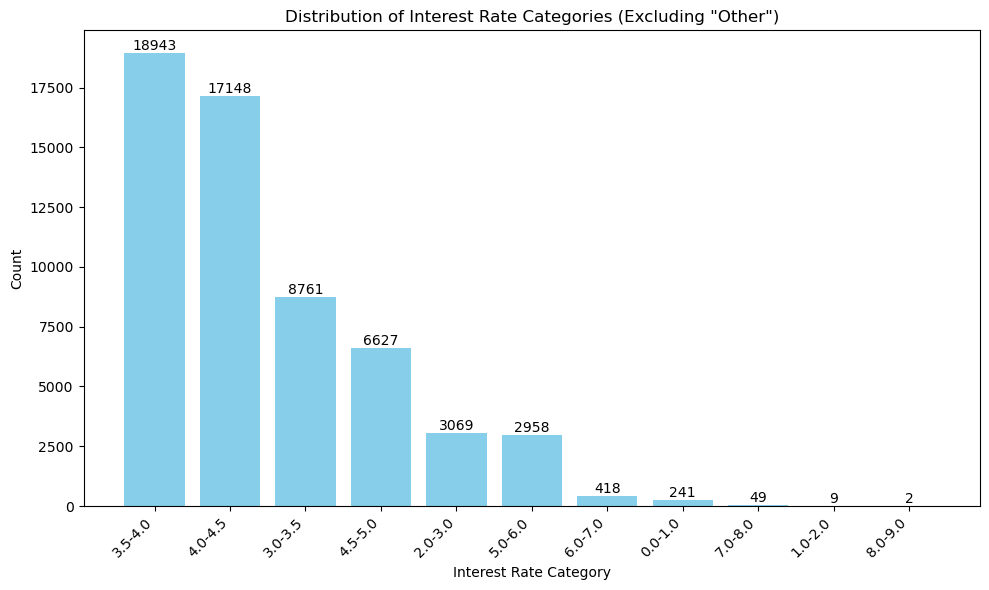

In [17]:
import matplotlib.pyplot as plt

# Filter the DataFrame to exclude the 'Other' category
filtered_df = df[df['interest_rate'] != 'Other']

# Get the value counts for the filtered DataFrame
value_counts = filtered_df['interest_rate'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(value_counts.index, value_counts.values, color='skyblue')
plt.xlabel('Interest Rate Category')
plt.ylabel('Count')
plt.title('Distribution of Interest Rate Categories (Excluding "Other")')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Display the counts on top of the bars
for i, count in enumerate(value_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [18]:
df.to_csv('5_interest_rate.csv', index=False)